**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

In [2]:
import numpy as np
import scipy.linalg as la
#Question 1
A = np.array([[10,2,1],[-10,-5,-4],[16,20,13]])
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [3]:
#Question 2 method 1
l,v = la.eig(A)
len(l[l!=0])

3

In [22]:
#method 2
la.det(A)
#Since determinant not equals 0, A is a on-singular matrix and rank =3

162.0

In [4]:
#methon 3
I = np.eye(3)
x,res,rank,s = la.lstsq(I,A)
rank

3

In [5]:
#method 4:rref
from sympy import *
MA = Matrix([[10,2,1],[-10,-5,-4],[16,20,13]])
rref_a,pivot= MA.rref()
rref_a
#rank(A)=3

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [6]:
#Question 3
eigenvalues,eigenvectors=la.eig(A)
eigenvalues = np.real_if_close(eigenvalues)
print('eigenvalues:')
print(eigenvalues)
print('eigenvectors:')
print(eigenvectors)

eigenvalues:
[ 9.  3.  6.]
eigenvectors:
[[ 0.57735027  0.         -0.12038585]
 [-0.57735027 -0.4472136  -0.24077171]
 [ 0.57735027  0.89442719  0.96308682]]


In [7]:
#Question 4
#eigenvalue的diagonal或eigenvectors的转换
ans=np.diag(la.eig(A)[0])
ans = np.real_if_close(ans)
ans

array([[ 9.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  6.]])

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

Note: Use `numpy.linalg.leastsq` function to solve this.

In [11]:
coordinates = np.array(
    [[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
y = coordinates[:,1].reshape(-1,1)
x = coordinates[:,0].reshape(-1,1)
x_square = x*x
X = np.column_stack((x,x_square))
final_x = np.column_stack((np.ones(x.shape[0]).reshape(-1,1),X))
#final_x
coefficient, res, rank, s, = np.linalg.lstsq(final_x,y,rcond=None)
#if the 'coefficient command above cannot work, please try the code below. Since these two codes works differently on my own laptop and vm.Thanks a lot.'
#coefficient, res, rank, s, = np.linalg.lstsq(final_x,y)
print('a=',coefficient[0][0])
print('b=',coefficient[1][0])
print('c=',coefficient[2][0])

a= -0.357628957528
b= -11.7853123187
c= 2.53125198581


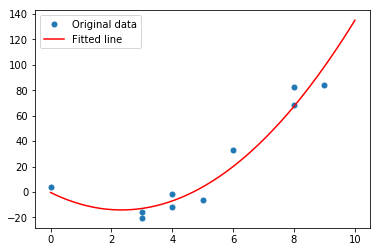

In [12]:
import matplotlib.pyplot as plt
def func(x,coefficient):
    a = coefficient[0][0]
    b = coefficient[1][0]
    c = coefficient[2][0]
    return a+b*x+c*x*x

plot_x = np.linspace(0,10,50)
plot_y = func(plot_x,coefficient)
plt.plot(x, y, 'o', label='Original data', markersize=5)
plt.plot(plot_x, plot_y, 'r', label='Fitted line')
plt.legend()
plt.show()

**3**. (20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.




In [13]:
#define A,b
A = np.array(
            [[2,-1,1],
             [-1,2,-1],
            [1,-1,1]])
b = np.array([6,2,1]).reshape(-1,1)
print('A:')
print(A)
print('b: ')
print(b)

A:
[[ 2 -1  1]
 [-1  2 -1]
 [ 1 -1  1]]
b: 
[[6]
 [2]
 [1]]


In [15]:
#eigen value are all positive, the matrix is positive-definite
value,vextor = la.eig(A)
value

array([ 3.73205081+0.j,  1.00000000+0.j,  0.26794919+0.j])

In [33]:
#Since A is a positive definite and symmetric matrix, u^TAu>0 and A=A^T ,it is appropriate to use cholesky decomposition 
C = la.cholesky(A)
C

array([[ 1.41421356, -0.70710678,  0.70710678],
       [ 0.        ,  1.22474487, -0.40824829],
       [ 0.        ,  0.        ,  0.57735027]])

In [34]:
C1 = la.cho_factor(A)
la.cho_solve(C1, b)

array([[ 5.],
       [ 3.],
       [-1.]])

**4**. (40 points)

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

- Plot the data together with the fitted polynomial. (10 points)



In [236]:
#normal equation
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
y = y.reshape(-1,1)
x = x.reshape(-1,1)
x_square = x*x
X = np.column_stack((x,x_square))
X = np.column_stack((np.ones(x.shape[0]).reshape(-1,1),X))
la.solve(X.T@X, X.T@y)

array([[ 2.55079998],
       [ 7.31478229],
       [-2.04118936]])

In [237]:
#gradient descent
def gradientDescent(β,X,y,learning_rate,iters,m):
    for i in range(iters):
        y_model = X@β #fitted y
        error = y_model-y
        gradient = np.dot(X.T,error)/m
        β -= gradient*learning_rate
    return β

β = np.zeros(3).reshape(-1,1)
m = 10 #obs
learning_rate = 0.0001
iters = 100000
coeff = gradientDescent(β,X,y,learning_rate,iters,m)
coeff

array([[ 2.73393241],
       [ 7.23151702],
       [-2.03359595]])

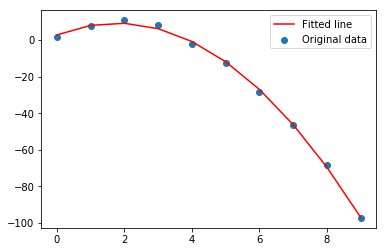

In [238]:
plt.scatter(x,y,label='Original data')
plt.plot(x, coeff[1]*x + coeff[2]*x**2 + coeff[0], 'r', label='Fitted line')
plt.legend()
plt.show()